# What's in this notebook?
- SMOTE, to mitigate class imbalance
- Testing out:
    - Naive Bayes
    - KNN
    - SVM
    - Random Forest
    - Logistic Regression
    - XGBoost
- Parameter tuning
- Prediction on brand new data

In [1]:
import pickle
import numpy as np
import pandas as pd

with open('X_train.pickle', 'rb') as f:
    X_train = pickle.load(f)
    
with open('X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)


## SMOTE

In [2]:
feats_to_smote = ['length','exclam_count', 'question_count', 'quote_count', 'dollar_count',
                   'ellipse_count', 'tpp_count', 'avg_word_per_sent', 'title_pol',
                   'title_subj', 'num_caps', 'curse_count', 'fpp_count', 'ftpp_diff',
                   'desc_pol', 'desc_subj', 'pol_similarity', 'subj_similarity',
                   'title_vader', 'desc_vader', 'vader_similarity', 'title_af', 'desc_af',
                   'af_similarity', 'lda_category']
X_train_smote = X_train[feats_to_smote]
X_test_smote = X_test[feats_to_smote]

In [3]:
!pip install imblearn

In [4]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train_smote, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Using TensorFlow backend.


Before OverSampling, counts of label '1': 378
Before OverSampling, counts of label '0': 967 

After OverSampling, the shape of train_X: (1934, 25)
After OverSampling, the shape of train_y: (1934,) 

After OverSampling, counts of label '1': 967
After OverSampling, counts of label '0': 967


In [5]:
X_train_smoted = pd.DataFrame(X_train_res, columns=X_train_smote.columns)
y_train_smoted = pd.DataFrame(y_train_res)

In [6]:
y_train_smoted[0].value_counts()

1    967
0    967
Name: 0, dtype: int64

## Initial Models
Vanilla models trained and tested to see which might perform the best.

In [7]:
import eval_helpers
import matplotlib.pyplot as plt

In [8]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

First, we'll scale data for models that need it. 

In [9]:
from sklearn import preprocessing

x = X_train_smoted.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train_scaled_smoted = pd.DataFrame(x_scaled, columns = X_train_smoted.columns)

x = X_test_smote.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_test_scaled = pd.DataFrame(x_scaled, columns = X_train_smoted.columns)

### Random Forest

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.73      0.73      0.73       485
           1       0.27      0.26      0.26       178

    accuracy                           0.61       663
   macro avg       0.50      0.50      0.50       663
weighted avg       0.61      0.61      0.61       663

0.6063348416289592
Normalized confusion matrix
[[0.73195876 0.26804124]
 [0.73595506 0.26404494]]


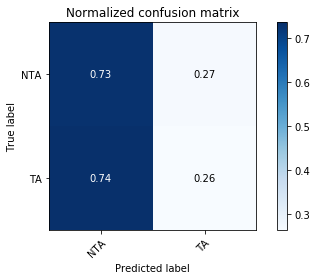

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = rf_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
eval_helpers.plot_confusion_matrix(y_test, y_pred, ['NTA', 'TA'], normalize=True)
plt.show()

### KNN

/Users/hannah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.77      0.60      0.68       485
           1       0.31      0.49      0.38       178

    accuracy                           0.57       663
   macro avg       0.54      0.55      0.53       663
weighted avg       0.64      0.57      0.60       663

0.5746606334841629
Normalized confusion matrix
[[0.60412371 0.39587629]
 [0.50561798 0.49438202]]


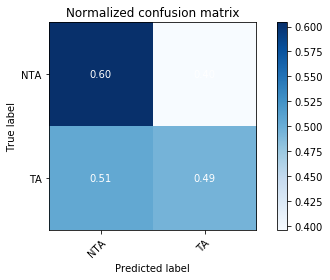

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = knn_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
eval_helpers.plot_confusion_matrix(y_test, y_pred, ['NTA', 'TA'], normalize=True)
plt.show()

### Logistic Regression

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.73      0.60      0.66       485
           1       0.26      0.38      0.31       178

    accuracy                           0.54       663
   macro avg       0.49      0.49      0.48       663
weighted avg       0.60      0.54      0.56       663

0.5414781297134238
Normalized confusion matrix
[[0.6        0.4       ]
 [0.61797753 0.38202247]]


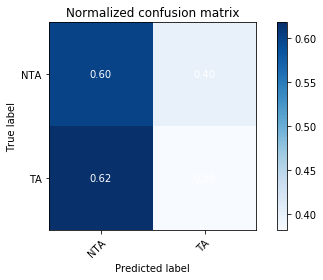

In [12]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = lr_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
eval_helpers.plot_confusion_matrix(y_test, y_pred, ['NTA', 'TA'], normalize=True)
plt.show()

### SVM

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.73      0.54      0.62       485
           1       0.27      0.46      0.34       178

    accuracy                           0.52       663
   macro avg       0.50      0.50      0.48       663
weighted avg       0.61      0.52      0.55       663

0.5188536953242836
Normalized confusion matrix
[[0.54020619 0.45979381]
 [0.53932584 0.46067416]]


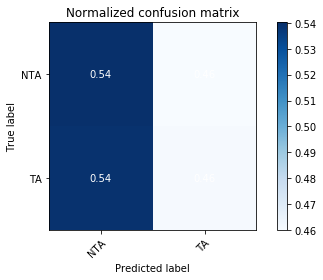

In [13]:
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = svc_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
eval_helpers.plot_confusion_matrix(y_test, y_pred, ['NTA', 'TA'], normalize=True)
plt.show()

### XGBoost

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.75      0.36      0.49       485
           1       0.28      0.66      0.39       178

    accuracy                           0.44       663
   macro avg       0.51      0.51      0.44       663
weighted avg       0.62      0.44      0.46       663

0.4434389140271493
Normalized confusion matrix
[[0.3628866  0.6371134 ]
 [0.33707865 0.66292135]]


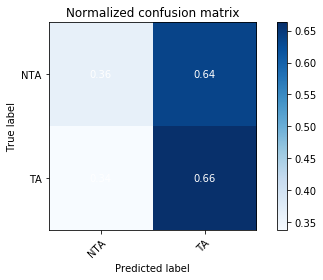

In [14]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = xgb_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
eval_helpers.plot_confusion_matrix(y_test, y_pred, ['NTA', 'TA'], normalize=True)
plt.show()

### Naive Bayes

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.73      0.69      0.71       485
           1       0.26      0.30      0.28       178

    accuracy                           0.58       663
   macro avg       0.49      0.49      0.49       663
weighted avg       0.60      0.58      0.59       663

0.5822021116138764
Normalized confusion matrix
[[0.68659794 0.31340206]
 [0.70224719 0.29775281]]


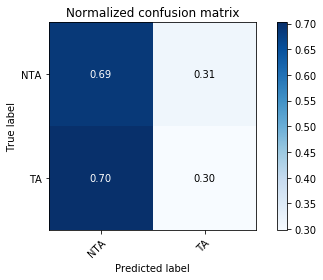

In [15]:
from sklearn.naive_bayes import GaussianNB

nbg_clf = GaussianNB()
nbg_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = nbg_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
eval_helpers.plot_confusion_matrix(y_test, y_pred, ['NTA', 'TA'], normalize=True)
plt.show()

What we really want here is for there to be relatively similar accuracy for both TA and NTA predictions. Additionally, we see it as better to classify a jerk as not a jerk rather than a non-jerk as a jerk (much like the courts, preferring to classify someone as not guilty when they are guilty, rather than the other way around), so we may have to make a decision between the fine-tuned model based on this.

Thus, we select KNN, Logistic Regression, and SVM as the models to fine tune and hopefully get our accuracy and f1 scores to increase!

## Parameter Tuning

### KNN

In [16]:
from sklearn.model_selection import GridSearchCV

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [30]:
# use a full grid over all parameters
param_grid = {'n_neighbors':[4, 5,6,7,8,9,10, 20, 50],
              'leaf_size':[1, 5, 10],
              'weights':['uniform', 'distance']
             }

# run grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, iid=False)
grid_search.fit(X_train_scaled_smoted, y_train_smoted)
report(grid_search.cv_results_)

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: Data

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: Data

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: Data

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: Data

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: Data

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: Data

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: Data

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: Data

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: Data

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: Data

Model with rank: 1
Mean validation score: 0.689 (std: 0.031)
Parameters: {'leaf_size': 1, 'n_neighbors': 6, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.689 (std: 0.031)
Parameters: {'leaf_size': 5, 'n_neighbors': 6, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.689 (std: 0.031)
Parameters: {'leaf_size': 10, 'n_neighbors': 6, 'weights': 'distance'}



/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConv

/Users/hannah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.77      0.62      0.69       485
           1       0.32      0.48      0.38       178

    accuracy                           0.58       663
   macro avg       0.54      0.55      0.53       663
weighted avg       0.65      0.58      0.60       663

0.583710407239819
Normalized confusion matrix
[[0.62061856 0.37938144]
 [0.51685393 0.48314607]]


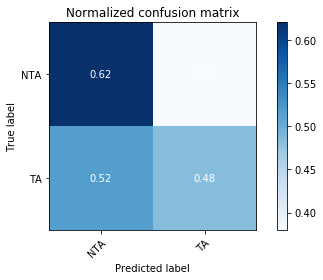

In [31]:
knn_clf = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = knn_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
eval_helpers.plot_confusion_matrix(y_test, y_pred, ['NTA', 'TA'], normalize=True)
plt.show()

### SVM

In [32]:
param_grid = [
  {'C': [1, 10, 100, 500, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 500, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [33]:
# run grid search
grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5, iid=False)
grid_search.fit(X_train_scaled_smoted, y_train_smoted)
report(grid_search.cv_results_)

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Model with rank: 1
Mean validation score: 0.578 (std: 0.025)
Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Model with rank: 2
Mean validation score: 0.570 (std: 0.027)
Parameters: {'C': 100, 'kernel': 'linear'}

Model with rank: 3
Mean validation score: 0.569 (std: 0.028)
Parameters: {'C': 500, 'kernel': 'linear'}

Model with rank: 3
Mean validation score: 0.569 (std: 0.028)
Parameters: {'C': 1000, 'kernel': 'linear'}



/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.73      0.65      0.69       485
           1       0.27      0.36      0.31       178

    accuracy                           0.57       663
   macro avg       0.50      0.50      0.50       663
weighted avg       0.61      0.57      0.59       663

0.5701357466063348
Normalized confusion matrix
[[0.64742268 0.35257732]
 [0.64044944 0.35955056]]


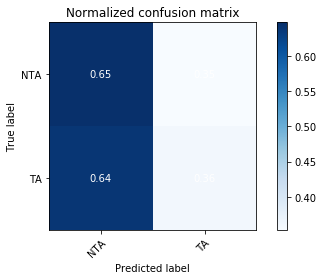

In [34]:
svc_clf = SVC(C=1000, gamma=.001, kernel='rbf')
svc_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = svc_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
eval_helpers.plot_confusion_matrix(y_test, y_pred, ['NTA', 'TA'], normalize=True)
plt.show()

### Logistic Regression

In [25]:
param_grid = {'penalty': ['l1', 'l2'], 
             'C': np.logspace(0, 4, 10)}

In [26]:
# run grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, iid=False)
grid_search.fit(X_train_scaled_smoted, y_train_smoted)
report(grid_search.cv_results_)

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda

Model with rank: 1
Mean validation score: 0.579 (std: 0.027)
Parameters: {'C': 2.7825594022071245, 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.573 (std: 0.027)
Parameters: {'C': 1.0, 'penalty': 'l2'}

Model with rank: 3
Mean validation score: 0.572 (std: 0.028)
Parameters: {'C': 7.742636826811269, 'penalty': 'l2'}



/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.72      0.57      0.64       485
           1       0.25      0.39      0.30       178

    accuracy                           0.52       663
   macro avg       0.48      0.48      0.47       663
weighted avg       0.59      0.52      0.55       663

0.5233785822021116
Normalized confusion matrix
[[0.57319588 0.42680412]
 [0.61235955 0.38764045]]


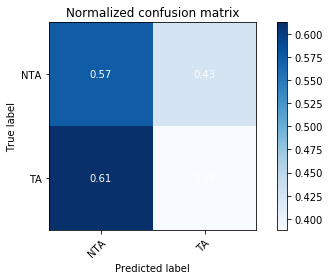

In [35]:
lr_clf = LogisticRegression(C=2.78, penalty='l2')
lr_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = lr_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
eval_helpers.plot_confusion_matrix(y_test, y_pred, ['NTA', 'TA'], normalize=True)
plt.show()

### Random Forest

In [51]:
param_grid = {'max_features': ['log2', 'sqrt', .2], 
             'n_estimators': [50, 100, 500,1000],
             'min_samples_leaf': [25, 50, 100]}

# run grid search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, iid=False)
grid_search.fit(X_train_scaled_smoted, y_train_smoted)
report(grid_search.cv_results_)


/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataCon

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataCon

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataCon

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataCon

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataCon

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataCon

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataCon

Model with rank: 1
Mean validation score: 0.735 (std: 0.128)
Parameters: {'max_features': 0.2, 'min_samples_leaf': 25, 'n_estimators': 1000}

Model with rank: 2
Mean validation score: 0.734 (std: 0.127)
Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 25, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.734 (std: 0.128)
Parameters: {'max_features': 0.2, 'min_samples_leaf': 25, 'n_estimators': 100}



/Users/hannah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.75      0.67      0.71       485
           1       0.30      0.38      0.33       178

    accuracy                           0.59       663
   macro avg       0.52      0.53      0.52       663
weighted avg       0.63      0.59      0.61       663

0.5912518853695324
Normalized confusion matrix
[[0.66804124 0.33195876]
 [0.61797753 0.38202247]]


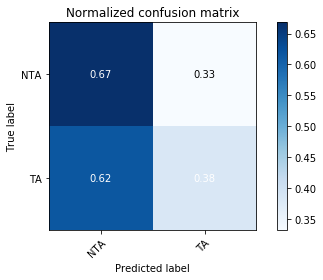

In [59]:
rf_clf = RandomForestClassifier(max_features = 'sqrt', n_estimators = 100, min_samples_leaf = 25)
rf_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = rf_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
eval_helpers.plot_confusion_matrix(y_test, y_pred, ['NTA', 'TA'], normalize=True)
plt.savefig('rf_cm',dpi=400)

### Naive Bayes

In [54]:
param_grid = {'var_smoothing': np.logspace(-5, -1, 20)}

# run grid search
grid_search = GridSearchCV(GaussianNB(), param_grid=param_grid, cv=5, iid=False)
grid_search.fit(X_train_scaled_smoted, y_train_smoted)
grid_search.cv_results_


/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

{'mean_fit_time': array([0.00819254, 0.01418285, 0.00979919, 0.00757575, 0.00508518,
        0.00416384, 0.00355935, 0.00305352, 0.00492702, 0.00603676,
        0.01427622, 0.00540342, 0.01136298, 0.00752597, 0.00775118,
        0.00637703, 0.00485463, 0.00486989, 0.00512452, 0.00747185]),
 'std_fit_time': array([0.00362021, 0.00846202, 0.00497873, 0.00270803, 0.00121668,
        0.00043058, 0.00034556, 0.00011028, 0.00280202, 0.00177446,
        0.00409653, 0.00070041, 0.00596612, 0.00227742, 0.00179   ,
        0.00268621, 0.00085886, 0.00085765, 0.00070091, 0.00198497]),
 'mean_score_time': array([0.0075078 , 0.00380254, 0.0068872 , 0.00434842, 0.00212574,
        0.00139785, 0.0012414 , 0.00120831, 0.00182796, 0.00374999,
        0.00280166, 0.00241046, 0.0058413 , 0.00175056, 0.00216265,
        0.00181823, 0.00180292, 0.00188031, 0.00154157, 0.00296354]),
 'std_score_time': array([9.66446212e-03, 2.23838534e-03, 7.16041436e-03, 3.10235875e-03,
        5.61848282e-04, 1.55736578e-

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.72      0.59      0.65       485
           1       0.26      0.39      0.31       178

    accuracy                           0.53       663
   macro avg       0.49      0.49      0.48       663
weighted avg       0.60      0.53      0.56       663

0.5324283559577677
Normalized confusion matrix
[[0.58556701 0.41443299]
 [0.61235955 0.38764045]]


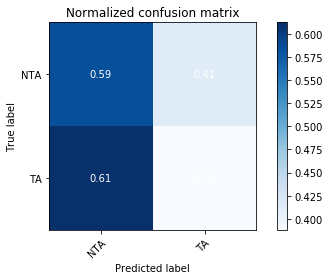

In [58]:
gnb_clf = GaussianNB(var_smoothing=.1)
gnb_clf.fit(X_train_scaled_smoted, y_train_smoted)
y_pred = gnb_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
eval_helpers.plot_confusion_matrix(y_test, y_pred, ['NTA', 'TA'], normalize=True)
plt.show()

### Final Model: KNN
Due to time constraints, that's about all the time we have to tune models. Based on balancing the accuracy of classifying TA and NTA correctly, KNN performed the best out of all models we looked at. Now we'll attempt to classify a never before seen AITA post, and see how it does!

In [45]:
X_train.columns

Index(['id', 'description', 'title', 'url', 'author_flair', 'length',
       'exclam_count', 'question_count', 'quote_count', 'dollar_count',
       'ellipse_count', 'tpp_count', 'avg_word_per_sent', 'title_pol',
       'title_subj', 'num_caps', 'curse_count', 'fpp_count', 'ftpp_diff',
       'desc_pol', 'desc_subj', 'pol_similarity', 'subj_similarity',
       'title_vader', 'desc_vader', 'vader_similarity', 'title_af', 'desc_af',
       'af_similarity', 'processed_titles', 'processed_description',
       'lemmatized_desc_str', 'lemmetized', 'lda_category'],
      dtype='object')